<a href="https://colab.research.google.com/github/Gakori/Hypothyroid-predictions-Nairobi-Hospital/blob/master/Nairobi_Hospital_Hypothyroid_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1) Defining the Question

## Specifying the Question

Nairobi hospital tested for hypothyroidism from thyroid patients.

As a data scientist, my main objective is to determine whether a patient has thyroid or not by training several models. 

The models to consider are:

 i) Random Forest

 ii) SVM

## Defining Metric for success

To achieve our objective,

i) We need to consider the patients symptoms to determine whether they have thyroid or not

ii) Build the models and interprate out outputs 

Perfom EDA to evaluate the relationship of the features with the target variable and with the features themselves.

Our baseline model would logistic regression which we will compare with other models ie Random forest and SVM

The models we create should, aim at a high accuracy of 90% as this is a medical dataset and therefore we intend to minimize any wrong predictions.

iii) Challenge the solution

## Understanding the context

Thyroid is a gland that sits low on the front of the neck. The most common thyroid problems involve abnormal production of thyroid hormones. Too much thyroid hormone results in a condition known as *hypothyroidism*. 

The signs and symptoms of hypothyroidism vary, depending on the severity of the hormone deficiency. Problems tend to develop slowly, often over a number of years.Signs and symptoms amy include, Fatigue
Increased sensitivity to cold, Constipation,Dry skin,Weight gain etc
This disease often affects middle-aged and older women but it can also affect infants.

## Recording experimental design

i) Loading the data

ii) Data cleaning 

iii) EDA ie univariate, bivariate and multivariate analysis

iv) Checking for multicollinearity

v) Fitting regression models to the data

vi) Conclusions



### 2) Reading the data

In [2]:
#import all the necessary libs
import pandas as pd
import numpy as np

#for viz
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('hypothyroid.csv')
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


*the data is a classification data*

In [4]:
#finding the shape of our data
df.shape

(3163, 26)

*The data contains 3,163 records and 26 columns*

In [5]:
#columns in the dataset
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

**column description**

status - patient has hypothyroid or negative

on_thyroxine - is used to treat an underactive thyroid (hypothyroidism). true/false
Thyroxine is the main hormone secreted into the bloodstream by the thyroid gland

query_on_thyroxine - true/false

on_antithyroid_medication - The medication helps stop the thyroid from producing T3 and T4 hormones. true/false

thyroid_surgery - The purpose of thyroid surgery is to remove part or all of the thyroid gland. patient has undergone surgery(t) or not(f)
 
query_hypothyroid - true/false

query_hyperthyroid - occurs when your thyroid gland produces too much of the hormone thyroxine. true/false

pregnant - Patient pregnant(t) or not(f)

sick - patient is sick(t) or not(f)

tumor - thyroid cancer growing. A patient has thyroid tumor(t) or does not(f)

lithium - Lithium, has been associated with developing goiter, hypothyroidism.uses lithium(t) or not(f)

goitre - A goiter indicates there is a condition present which is causing the thyroid to grow abnormally.t/f

TSH_measured - if the TSH levels were measured(y) or not(n)

TSH - High TSH levels can mean your thyroid is not making enough thyroid hormones while Low TSH levels can mean your thyroid is making too much of the hormones

T3_measured - measured(y) or not(n)

T3 - is the body's active form of the thyroid hormone thyroxine.Low T3 levels may mean you have hypothyroidism

TT4_measured - measured(y) or not(n)

TT4 - is a type of thyroid hormone. This test measures the level of T4 in your blood. Too much or too little T4 can indicate thyroid disease.

T4U_measured - measured(y) or not(n)

FTI_measured - measured(y) or not(n)

TBG_measured - measured(y) or not(n)

TBG - a nonharmful condition that is either acquired or inherited.Increased TBG levels may be due to hypothyroidism

In [6]:
#datatypes of the records
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

*some of the records are not in the correct format ie should be categorical, float and boolean*

### 3) Data Relevance

The dataset contains 3,163 records and 26 columns. Most of the columns are not in their correct datatypes as most should be either float, boolean or categorical. As our main objective is to determine if a patient suffers from hypothyroid or not, the different features are relevant to indicate the status of a patient.

## Data preparation

In [7]:
#checking all the columns
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

*All columns seem relevant to determine the status of a patient*

In [8]:
#checking for null values
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

*There are no null values in our data*

In [9]:
#checking for any duplicated values
df[df.duplicated()]

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
53,hypothyroid,69,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,0.80,y,53,y,0.86,y,61,n,?
66,hypothyroid,62,M,f,f,f,f,f,f,f,f,f,f,f,y,100,y,0.40,y,10,y,1,y,10,n,?
124,hypothyroid,77,F,f,f,f,f,f,f,f,f,f,f,f,y,23,y,0.50,y,33,y,0.67,y,49,n,?
128,hypothyroid,79,F,f,f,f,f,f,f,f,f,f,f,f,y,29,y,1.60,y,47,y,0.97,y,48,n,?
131,hypothyroid,50,F,t,f,f,f,f,f,f,f,f,f,f,y,34,n,?,y,55,y,0.93,y,60,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,negative,28,M,f,f,f,f,f,f,f,f,f,f,f,y,1,y,3.10,y,107,y,1.05,y,103,n,?
3055,negative,33,F,f,f,f,f,f,f,f,f,f,f,f,n,?,y,0.80,y,88,y,1.02,y,86,n,?
3066,negative,74,F,t,f,f,f,f,f,f,f,f,f,f,y,21,y,1.80,y,126,y,1.18,y,107,n,?
3111,negative,89,M,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.90,y,82,y,0.80,y,103,n,?


*The data contains 77 duplicates*

### 4) Data cleaning 

In [10]:
#drop duplicate values
df.drop_duplicates(keep='first', inplace = True)
df.duplicated().any()

False

In [11]:
#we need to drop the '?' for our anlysis to work
#replace it with nan
df.replace('?', np.nan, inplace=True)

*replacing ? with nan introduces null values and its easier to change the dtypes into the correct format*

In [12]:
#changing column datatypes into an appropriate format
#separating cols according to the datype
#use for loop to iterate through all columns
#converting boolean columns to true/false

bool_cols = ['on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery',
            'query_hypothyroid','pregnant', 'sick', 'tumor', 'lithium' ,'goitre',
            'query_hyperthyroid']
for column in bool_cols:
  df[column] = df[column].replace('f', False)
  df[column] = df[column].replace('t', True)

#categorical columns
for col in ['status', 'sex','TSH_measured','T3_measured',  'TT4_measured', 
       'T4U_measured','FTI_measured']:df[col] = df[col].astype('category')

# #boolean columns
for col in ['on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery',
            'query_hypothyroid','pregnant', 'sick', 'tumor', 'lithium' ,'goitre',
            'query_hyperthyroid']:df[col] = df[col].astype('bool')

# #float columns
for col in ['age','TSH', 'T3','TT4','T4U','FTI']:df[col] = df[col].astype(float)

In [13]:
#reviewing the columns
df['goitre'].value_counts()

False    2990
True       96
Name: goitre, dtype: int64

In [14]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,False,False,False,False,False,False,False,False,False,False,False,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,hypothyroid,15.0,F,True,False,False,False,False,False,False,False,False,False,False,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,hypothyroid,24.0,M,False,False,False,False,False,False,False,False,False,False,False,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
3,hypothyroid,24.0,F,False,False,False,False,False,False,False,False,False,False,False,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
4,hypothyroid,77.0,M,False,False,False,False,False,False,False,False,False,False,False,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN


In [15]:
#this introduces null values and we have to deal with them
#checking for missing values and their percentages

total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100

percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(10)

,Total,%
TBG,2835,91.9
T3,680,22.0
TSH,455,14.7
age,438,14.2
TT4,240,7.8
T4U,239,7.7
FTI,238,7.7
sex,73,2.4
pregnant,0,0.0
on_thyroxine,0,0.0


*We observe 7 features have missing valueswith TBG with the most 91.8%*

In [16]:
#dealing with missing values
#dropping TBG as i has a high no. of missing values

df.drop(['TBG', 'TBG_measured'], axis=1, inplace=True)

In [17]:
#replace the other with the mean
#find mean of each column
m = ['age','TSH','T3','TT4','T4U','FTI']
for i in m:
  all=df[m].mean()
#call all the means
all

# #replace with mean
df.fillna(df[m].mean(), inplace=True)

# #replace gender with the mode
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

In [18]:
#mean for each numeric columns
all

age     51.112538
TSH      5.809320
T3       1.933666
TT4    108.706922
T4U      0.977559
FTI    115.489080
dtype: float64

*mean for columns that had null values*

In [19]:
#null vaues
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
dtype: int64

In [20]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 0 to 3162
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   status                     3086 non-null   category
 1   age                        3086 non-null   float64 
 2   sex                        3086 non-null   category
 3   on_thyroxine               3086 non-null   bool    
 4   query_on_thyroxine         3086 non-null   bool    
 5   on_antithyroid_medication  3086 non-null   bool    
 6   thyroid_surgery            3086 non-null   bool    
 7   query_hypothyroid          3086 non-null   bool    
 8   query_hyperthyroid         3086 non-null   bool    
 9   pregnant                   3086 non-null   bool    
 10  sick                       3086 non-null   bool    
 11  tumor                      3086 non-null   bool    
 12  lithium                    3086 non-null   bool    
 13  goitre                     3086 n

In [21]:
#valuecounts of our data
#for loop to iterate through all the columns

for i in df.columns:
  x=df[i].value_counts()
  print('Column name is:',i,'and it value is:',x)
  print()

Column name is: status and it value is: negative       2945
hypothyroid     141
Name: status, dtype: int64

Column name is: age and it value is: 51.112538    438
59.000000     63
62.000000     61
60.000000     60
72.000000     59
            ... 
4.000000       1
93.000000      1
90.000000      1
98.000000      1
97.000000      1
Name: age, Length: 93, dtype: int64

Column name is: sex and it value is: F    2192
M     894
Name: sex, dtype: int64

Column name is: on_thyroxine and it value is: False    2640
True      446
Name: on_thyroxine, dtype: int64

Column name is: query_on_thyroxine and it value is: False    3031
True       55
Name: query_on_thyroxine, dtype: int64

Column name is: on_antithyroid_medication and it value is: False    3044
True       42
Name: on_antithyroid_medication, dtype: int64

Column name is: thyroid_surgery and it value is: False    2983
True      103
Name: thyroid_surgery, dtype: int64

Column name is: query_hypothyroid and it value is: False    2851
True    

*from the above:*
most patients had negative results of hypothyroid.

most patients ages are from 28 to 64.
females were at high numbers in the test

In [22]:
#statistical summary
df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000
mean,51.112538,5.809320,1.933666,108.706922,0.977559,115.489080
std,17.854431,22.180994,0.864826,42.836471,0.216873,57.780967
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,38.000000,0.000000,1.500000,85.000000,0.860000,92.000000
50%,51.112538,1.000000,1.933666,107.000000,0.977559,110.000000
75%,64.000000,5.809320,2.200000,124.000000,1.050000,126.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


*the mean age is at 51 indiacting that most patients were around this age.*

## Checking for outliers

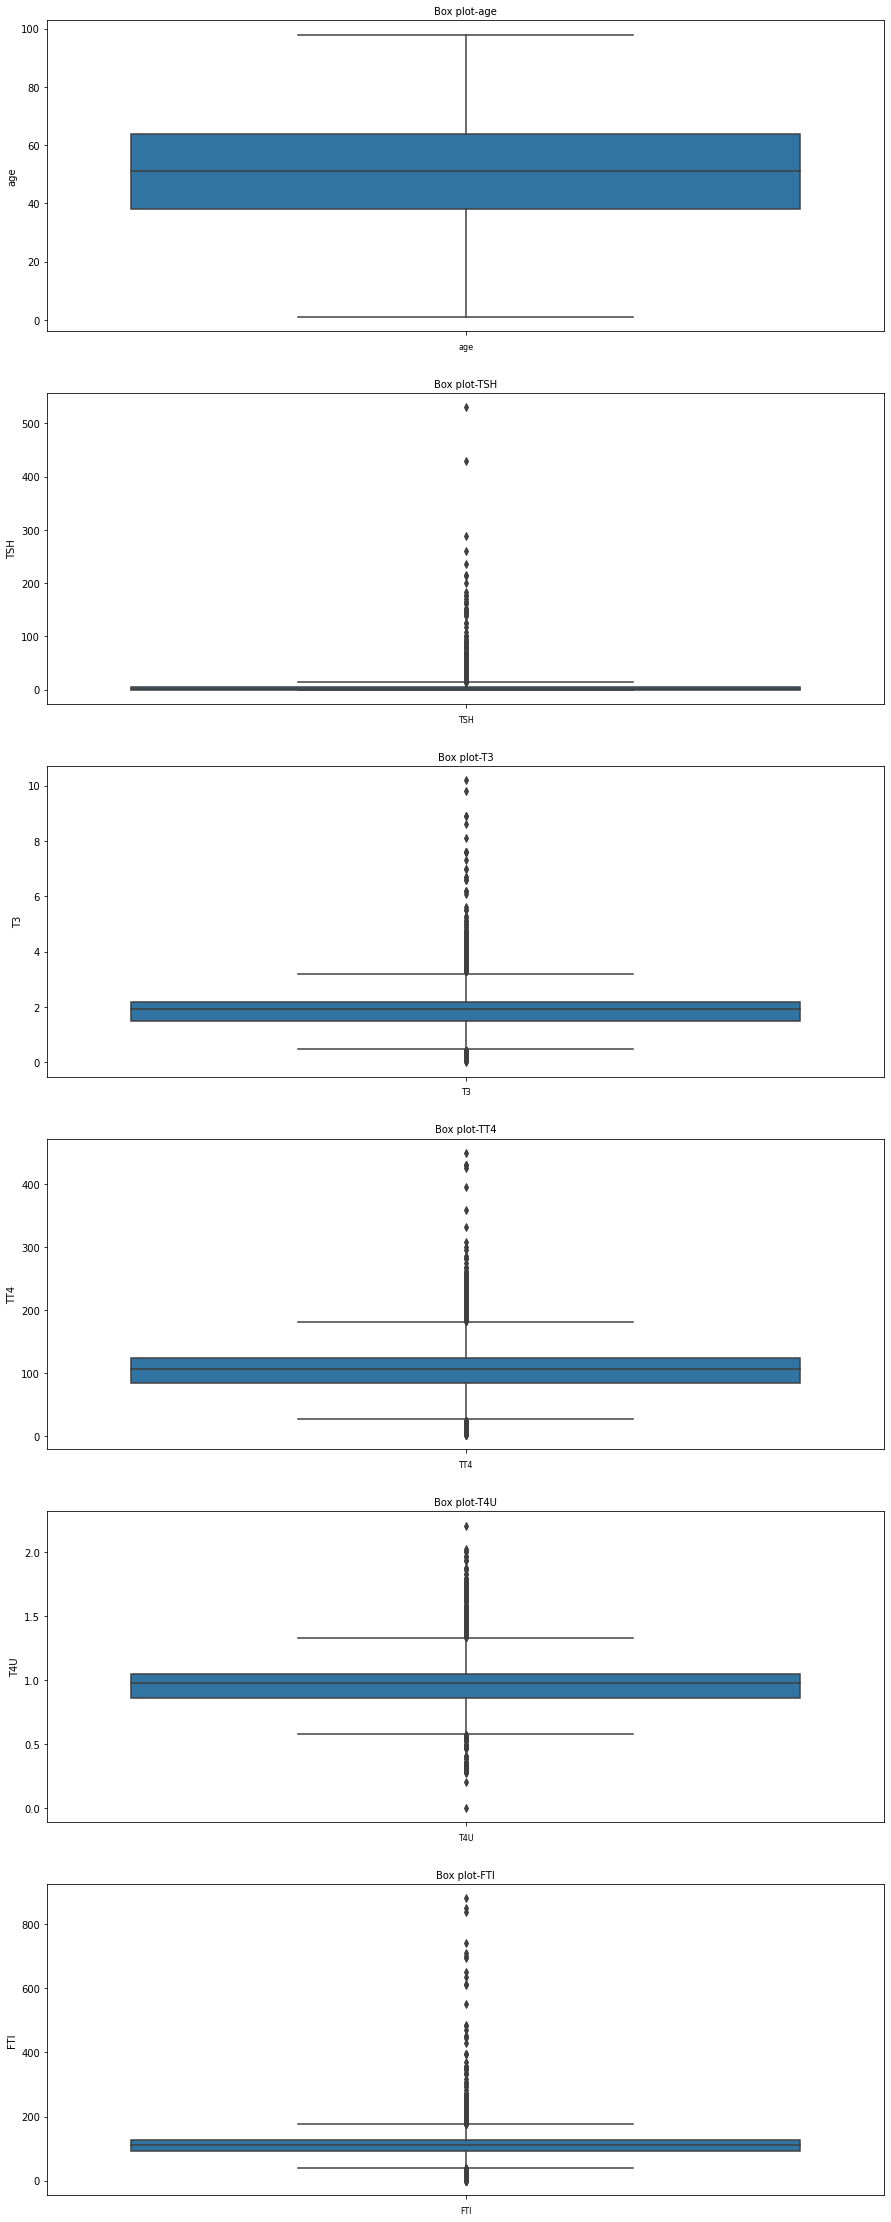

In [ ]:
#outliers in numerical columns
numeric_cols = ['age','TSH','T3','TT4','T4U','FTI']
fig,ax=plt.subplots(len(numeric_cols), figsize=(15,40))

for i, col_val in enumerate(numeric_cols):
  sns.boxplot(y= df[col_val], ax=ax[i])
  ax[i].set_title('Box plot-{}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

*age does not contain outliers.The other numerical columns contain outliers but we are not going to drop them as high levels of a certain feature may indicate presence of hypothyroid*

### 5) EDA

## ***Pandas profiling***



In [ ]:
!pip install -U pandas-profiling

In [ ]:
import pandas_profiling as pp
from pandas_profiling import ProfileReport
ProfileReport(df, title = "hypothyroid data report")

**Pandas Profiling Report**

*In the overview section, we have 3163 observations and 26 columns of which 17 are booleans and 9 are categorical.*

In the columns:

**status** which is our target variable indicates that most patients results were negative and only a few had tested positive for hypothyroid

**Age** is has been classified into categories.The age vary from 28-60.

**Sex** . There were more female patients than male

**on_thyroxine**,**query_on_thyroxine**  false

**on_antithyroid_medication** most were not on this type of medication,f

**thyroid_surgery**, most patients have not undergone the thyroid surgery, f

**pregnant** most females were not pregnant only a few were

**sick**, **tumor**, **lithium**, **goitre** - most patients did not surfer these conditions

**TSH_measured**,**TSH**, most patients TSH levels were measured.Most had low levels of 0

**T3_measured**, **T3**, most patients T3 levels were measured and most had T3 level of 3

**TT4_measured, TT4**,  most patients TT4 levels were measured.

**T4U_measured, T4U**, most patients T4U levels were measured

**FTI_measured, FTI**,  most patients FTI levels were measured.

**TBG_measured, TBG**, most patients TBG levels were not measured.


From the heat map, we observe that there are high correlations between the independent variables.



## **Univariate Analysis**

In [ ]:
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI'],
      dtype='object')

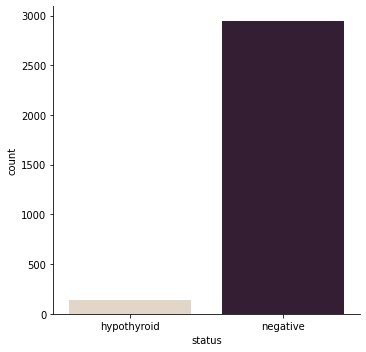

In [ ]:
#plotting distribution of the variables
#status
sns.catplot(x="status", kind="count", palette="ch:.25", data=df);

*Patients who tested negative were more*

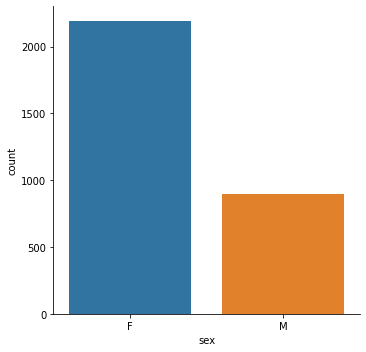

In [ ]:
#gender count
sns.catplot(x="sex", kind="count", data=df);

*female patients were more than male patients*

## **Bivariate Analysis**

In [ ]:
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI'],
      dtype='object')

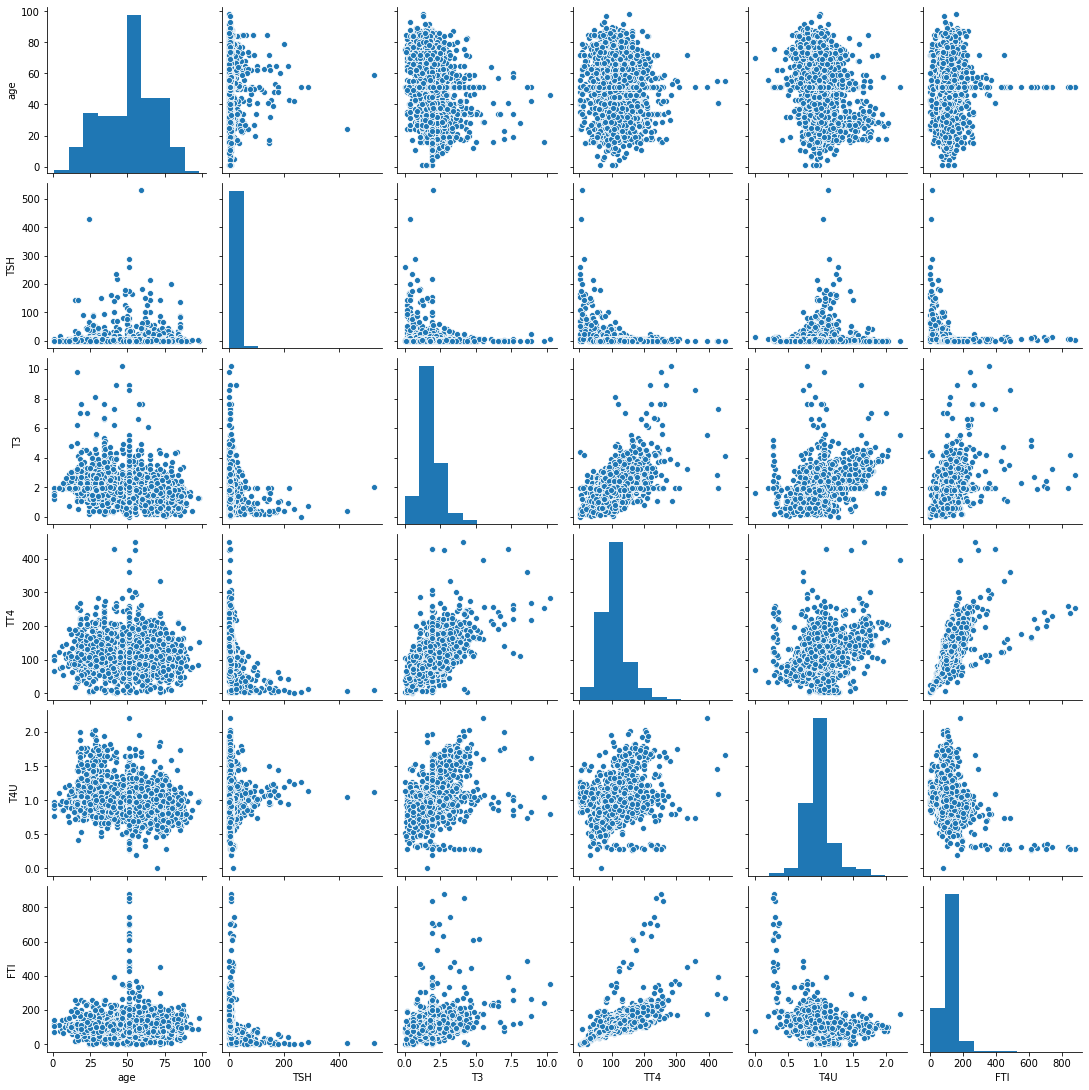

In [ ]:
#pairplots
sns.pairplot(numeric_cols)

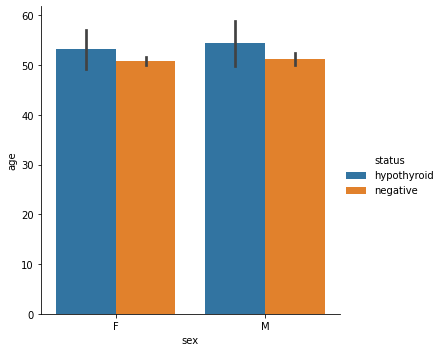

In [ ]:
# gender and their status
sns.catplot(x="sex", y="age", hue="status", kind="bar", data=df);

*Males are slightly older than females and they ae prone to hypothyroid more*

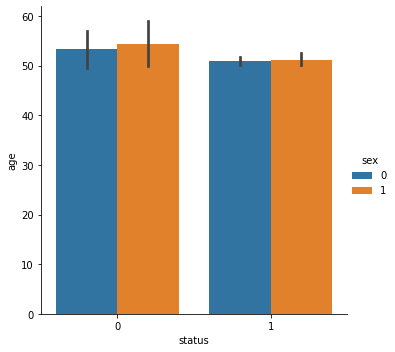

In [ ]:
# plotting 
sns.catplot(x="status", y="age", hue="sex", kind="bar", data=df);

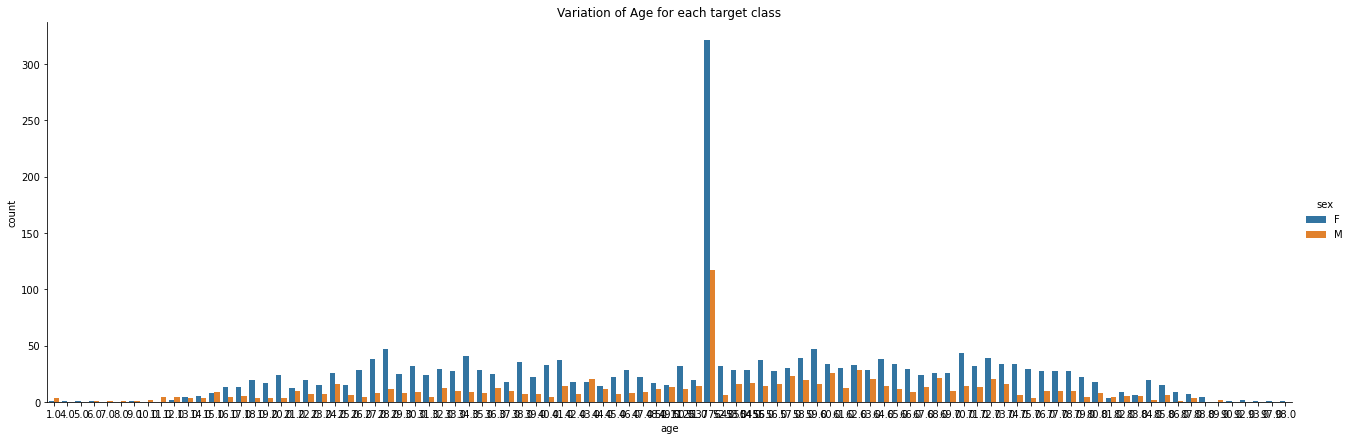

In [ ]:
#age distribution
sns.catplot(kind = 'count', data = df, x = 'age', hue = 'sex', 
            order = df['age'].sort_values().unique(),
            height=6,aspect=3)

plt.title('Variation of Age for each target class')
plt.show()

*The age of most patients, both male and female is at around 50*

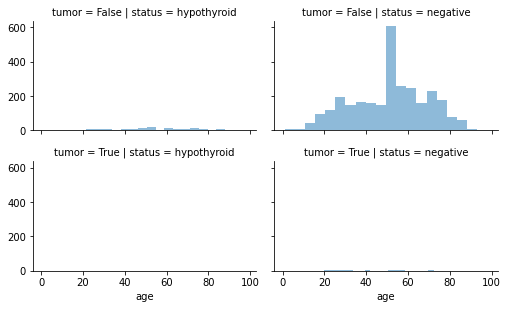

In [ ]:
#tumor
grid = sns.FacetGrid(df, col='status', row='tumor', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=0.5, bins=20)
grid.add_legend()

*most patients who had no tumor had their results negative indicatinf absence of hypothyroid, a few did not have the tumor but had hypothyroid*

*very low numbers had the tumor but tested negative for hypothyroid*

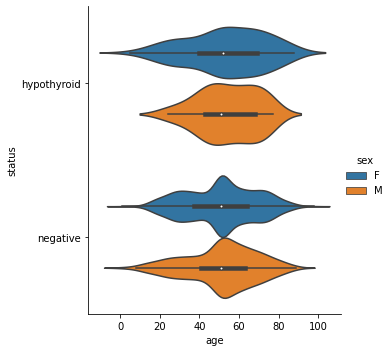

In [ ]:
sns.catplot(x="age", y="status", hue="sex",
            kind="violin", data=df);

*Patients whose hypothyroid results were positive were around the age of 40 to 70*

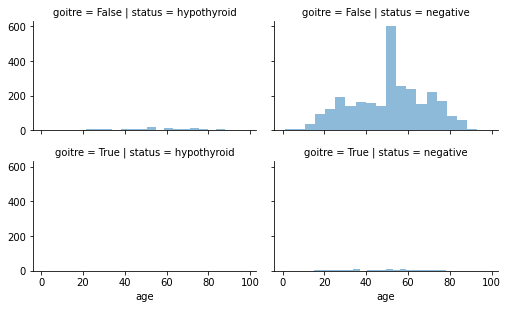

In [ ]:
#goitre
grid = sns.FacetGrid(df, col='status', row='goitre', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=0.5, bins=20)
grid.add_legend()

*most patients who indicated no symptoms of goitre tested naegative for hypothyroid.a few who had no goitre tested positive for hypothyroid*

*very low numbers who had goitre tested negative for hypothyroid and extremely low numbers who had goitre tested positive for hypothyroid*

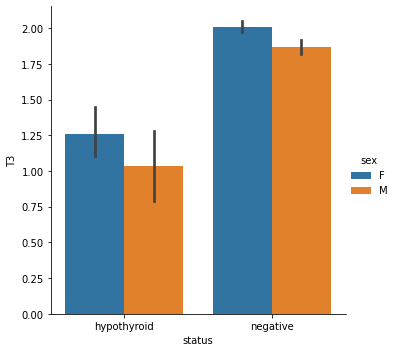

In [ ]:
#hormone T3 and status

sns.catplot(x="status", y="T3", hue="sex", kind="bar", data=df);

*Patients with low T3 are more prone to hypothroid*

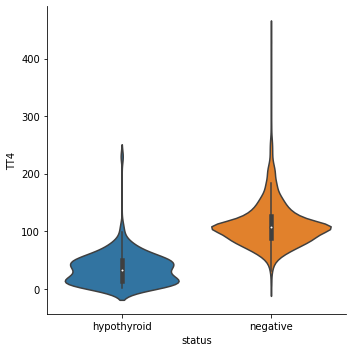

In [ ]:
sns.catplot(x="status", y="TT4",kind="violin", split=True, data=df);

*patients with low TT4 levels are more prone to hypothyroid*

**Correlated features**

from the pairplot, some variables are correlated. ie T3 and FTI, T3 nand TT4.

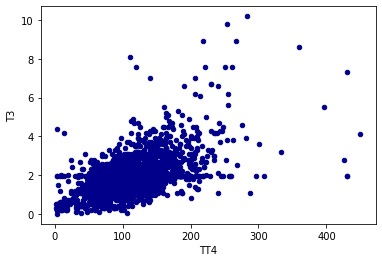

In [ ]:
#correlated independent variable
#TT4 nad T3

ax1 = df.plot.scatter(x='TT4', y='T3', c='DarkBlue')

*the plot shows a strong positive correlation between the two hormones.*

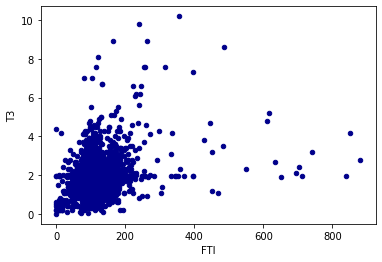

In [ ]:
#T3 nad FTI

ax1 = df.plot.scatter(x='FTI', y='T3', c='DarkBlue')

*The correlations among these variables may because the hormones work together to regulate the thyroid gland*

## **Multivariate Analysis**

In [ ]:
#checking for the correlation in numerical columns
numeric_cols = df[['age','TSH','T3','TT4','T4U','FTI']]
CorrMatrix=numeric_cols.corr()
CorrMatrix

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,-0.007352,-0.265743,-0.086317,-0.188786,0.017737
TSH,-0.007352,1.000000,-0.169724,-0.309057,0.072508,-0.240105
T3,-0.265743,-0.169724,1.000000,0.533845,0.386450,0.281517
TT4,-0.086317,-0.309057,0.533845,1.000000,0.320415,0.677345
T4U,-0.188786,0.072508,0.386450,0.320415,1.000000,-0.294437
FTI,0.017737,-0.240105,0.281517,0.677345,-0.294437,1.000000


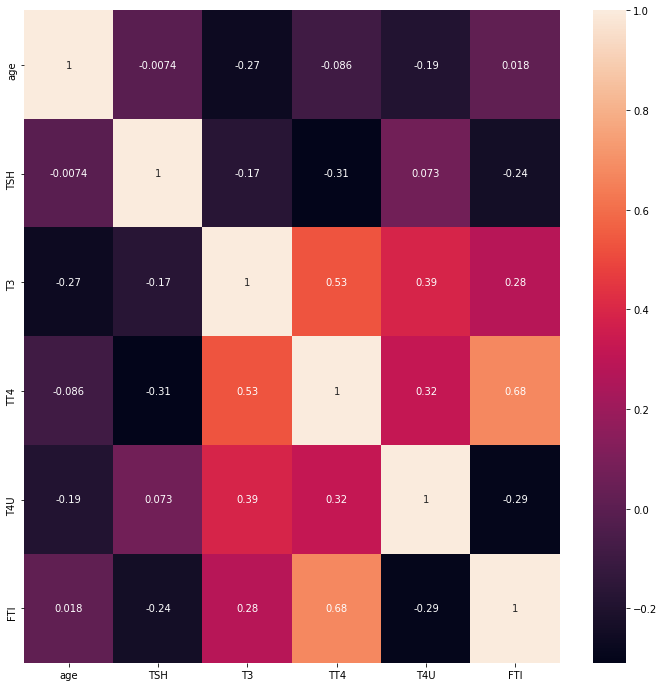

In [ ]:
#heatmap to view the correlation 
#
plt.figure(figsize=(12, 12))  

# Identifying factors that are highly correlated to house price
# 
sns.heatmap(CorrMatrix, annot = True)

### 6) Modelling

## **BaseLine Model**

*Our baseline model will be the logistic regression.It is mainly used for classification purposes.*

In [23]:
#1 is yes , 0 is no
#1 male,0 female
# 1true, 0 false
#1 hypothyroid, 0 negative
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['TT4_measured'] = le.fit_transform(df['TT4_measured'])
df['sex'] = le.fit_transform(df['sex'])
df['on_thyroxine'] = le.fit_transform(df['on_thyroxine'])
df['query_on_thyroxine'] = le.fit_transform(df['query_on_thyroxine'])
df['on_antithyroid_medication'] = le.fit_transform(df['on_antithyroid_medication'])
df['thyroid_surgery'] = le.fit_transform(df['thyroid_surgery'])
df['query_hypothyroid'] = le.fit_transform(df['query_hypothyroid'])
df['query_hyperthyroid'] = le.fit_transform(df['query_hyperthyroid'])
df['pregnant'] = le.fit_transform(df['pregnant'])
df['sick'] = le.fit_transform(df['sick'])
df['tumor'] = le.fit_transform(df['tumor'])
df['lithium'] = le.fit_transform(df['lithium'])
df['goitre'] = le.fit_transform(df['goitre'])
df['T3_measured'] = le.fit_transform(df['T3_measured'])
df['T4U_measured'] = le.fit_transform(df['T4U_measured'])
df['FTI_measured'] = le.fit_transform(df['FTI_measured'])
df['TSH_measured'] = le.fit_transform(df['TSH_measured'])
df['status'] = le.fit_transform(df['status'])

In [24]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0
2,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0
3,0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0
4,0,77.0,1,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
#logistic regression
#set the x and y

X=df.drop(['status'], axis=1).values
y=df['status'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

0.9827213822894169


array([[ 37,  10],
       [  6, 873]])

*our baseline model is 98% accuarte which is a good model*

*we have 37+873 correct predictions and 6+10 incorrect predictions*

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.51      0.67        47
           1       0.97      1.00      0.99       879

    accuracy                           0.97       926
   macro avg       0.97      0.75      0.83       926
weighted avg       0.97      0.97      0.97       926



## **Random Forest**

*Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance*

In [ ]:
#we need to encode our data foreasier modelling
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0
2,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0
3,0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0
4,0,77.0,1,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0


In [ ]:
#y is the target(status)
#x independent vars
y = df['status'].values
test_features = df.columns.to_list()
test_features.remove('status')
X = df[test_features].values

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

# Model Accuracy?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9838012958963283


*The model accuracy is 0.983 which is a good model compared to the logistics one*

In [ ]:
#feature importance
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

feature_imp = pd.Series(clf.feature_importances_, index=test_features).sort_values(ascending=False)
feature_imp

FTI                          0.362815
TSH                          0.235355
TT4                          0.218043
T3                           0.053413
T4U                          0.043983
age                          0.033993
on_thyroxine                 0.009059
query_hypothyroid            0.008364
thyroid_surgery              0.007759
TSH_measured                 0.005334
on_antithyroid_medication    0.005211
sex                          0.005170
T3_measured                  0.004074
sick                         0.003342
goitre                       0.001723
query_hyperthyroid           0.001509
TT4_measured                 0.000204
FTI_measured                 0.000182
T4U_measured                 0.000163
tumor                        0.000156
lithium                      0.000107
pregnant                     0.000021
query_on_thyroxine           0.000019
dtype: float64

No handles with labels found to put in legend.


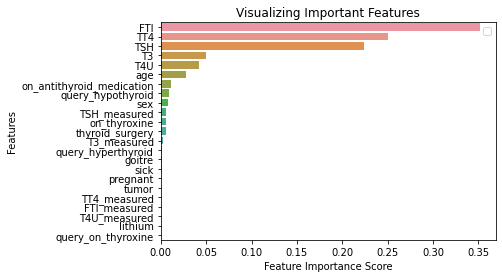

In [ ]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

***Modelling from the selected features***

In [ ]:
# Import train_test_split function
#use the important features
# Split dataset into features and labels
X=df[['FTI', 'TT4', 'TSH', 'T3', 'T4U', 'age' , 'on_antithyroid_medication', 'query_hypothyroid',
        'sex', 'TSH_measured', 'on_thyroxine', 'thyroid_surgery']] 
y=df['status']                    

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.987043035631652


*The accuracy score is at 0.987, there is a slight increase in the accuracy compared to the classifier meaning the model that has undergone feature selection performs better*

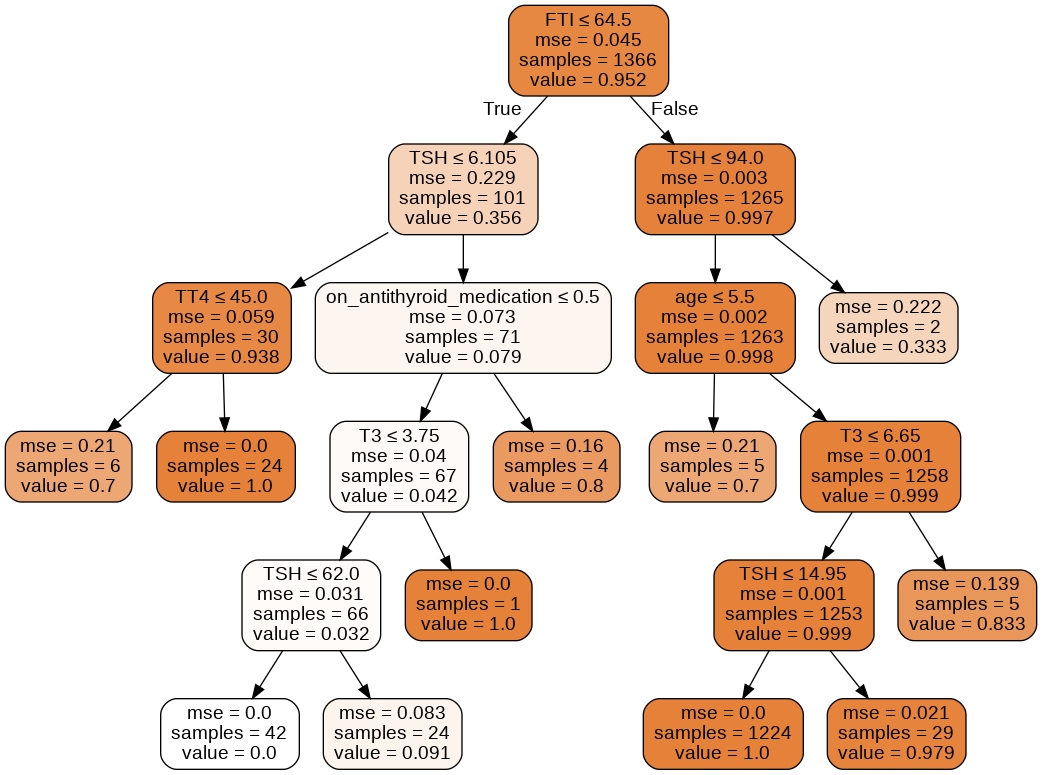

In [ ]:
#visualize the tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Gradient classifier**

Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
y = df['status'].values
X = df[test_features].values
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=0)

#scaling the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#tryoing different learning rate to compare the accuracy 
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2,
                                        max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (testing): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.962
Accuracy score (testing): 0.960
Learning rate:  0.075
Accuracy score (training): 0.973
Accuracy score (testing): 0.966
Learning rate:  0.1
Accuracy score (training): 0.979
Accuracy score (testing): 0.976
Learning rate:  0.25
Accuracy score (training): 0.991
Accuracy score (testing): 0.980
Learning rate:  0.5
Accuracy score (training): 0.996
Accuracy score (testing): 0.975
Learning rate:  0.75
Accuracy score (training): 0.976
Accuracy score (testing): 0.971
Learning rate:  1
Accuracy score (training): 0.971
Accuracy score (testing): 0.968


*At a learning rate 0.25 our test set performs best, 0.980, the training set also indicates a good perfomance. We will therefore use the learning rate 0.25, to make the confusion matrix*

In [ ]:
#confusion matrix
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.25, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)
predictions
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Accuracy: 0.9805825242718447
Confusion Matrix:
[[ 17   8]
 [  5 588]]


*we have 65+2053 correct predictions and 6+37 incorrect predictions*

**Adaboost Classifier**

*Used to achieve high accuracy. It builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier.*

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict test set
y_pred = model.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9892008639308856


## **Support Vector Machine(SVM)**

***Linear model***

In [ ]:
#using status
X=df.drop(['status'],axis=1).values
y=df['status'].values

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_test.shape

#building an svm model
from sklearn.svm import SVC,LinearSVC
thyroid_model = SVC(kernel = 'linear')

# #training the model
thyroid_model.fit(X_train,y_train)

# # Predict the response for the test set
y_pred = thyroid_model.predict(X_test)

In [ ]:
#accuracy of the model
model_accuracy = accuracy_score(y_test,y_pred)
print(model_accuracy)

# #confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

0.9870550161812298
[[ 19   6]
 [  2 591]]


***Polynomial function***

*In polynomial kernel, you also have to pass a value for the degree parameter of the SVC class. This basically is the degree of the polynomial*

In [ ]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# making prediction
y_pred = polyclassifier.predict(X_test)

# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9805825242718447
[[ 19   6]
 [  6 587]]


***Radial Basis function***

In [ ]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9854368932038835
[[ 18   7]
 [  2 591]]


*Out of all the three, linear perfomed well with an accuracy of 0.987*

**linear model with the most important features**

In [ ]:
X=df[['FTI','TSH']].values
y=df['status'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

#making predictons
y_pred = svclassifier.predict(X_test)

#model accuracy
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

0.9805825242718447
[[ 18   7]
 [  5 588]]


*the linear model still perfoms best with a few features*

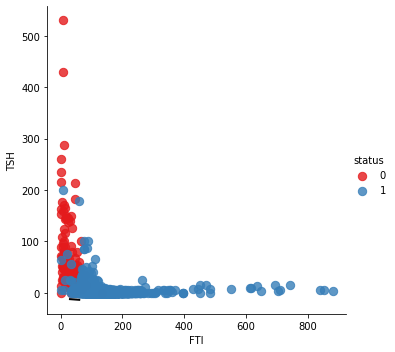

In [ ]:
# Get the separating hyperplane
w = thyroid_model.coef_[0] #get the first coefficient of our model
a = -w[0] / w[1]
# Get the x values of our hyperplane. We achieve this by creating a range numbers 
#from the largest number of the butter vlaues and the smallest number of the butter values.  
xx = np.linspace(30, 60)
yy = a * xx - (thyroid_model.intercept_[0]) / w[1]

# Plot the hyperplane
sns.lmplot('FTI', 'TSH', data=df, hue='status', palette='Set1', fit_reg=False,
           scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');


### 7) Challenging the solution

From the models created , Most of the models were accurate. This indicated that Nairobi Hospital performed the tested appropriately

**Overall perfomance**

Out of all the models created, adaboost performed best with an accuracy of 0.989 and in SVM, linear kernel function perfomed best with an accuracy of 0.9870. This is an indication that most status of the patients were predicted correctly.

*Using other models to observe if the model performs better than adaboost ans SVM*

**K Nearest Neighbor**

In [28]:
from sklearn.neighbors import KNeighborsClassifier
X=df.drop(['status'], axis=1).values
y=df['status'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train) 
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

99.21

**Naive Bayes**

In [29]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred=gaussian.predict(X_test)
acc_gaussian=round(gaussian.score(X_train, y_train) * 100,2)
acc_gaussian

34.86

KNN gives an accuracy of 99.21 which has improved compared to that of adaboost and linear kernel function but this can be a case of overfitting . Naive Bayes has a very low score of 34% and would therefore reccommend adaboost and linear kernel.